In [1]:
import cv2 as cv
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH_TO_CSV = '../annotations/annotationsTrain.csv'
PATH_TO_IMAGES = '../images/'

In [3]:
df = pd.read_csv(PATH_TO_CSV)
grouped = df.groupby('filename')

In [4]:
i = 0
cropped = []
for k, g in zip(grouped.groups.keys(), grouped.groups):
    img = cv.imread(os.path.join(PATH_TO_IMAGES, g))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    for idx, row in grouped.get_group(g).iterrows():
        cropped.append(img[row['ymin']:row['ymax'], row['xmin']:row['xmax']])
    i = i + 1
    if (i == 4):
        break

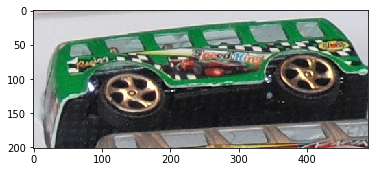

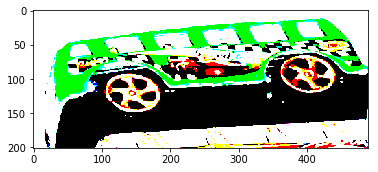

In [10]:
for i, img in enumerate(cropped):
    ret, thresh = cv.threshold(img, 90, 255, cv.THRESH_BINARY)
    plt.figure()
    plt.imshow(img)
    plt.figure()
    plt.imshow(thresh)
    break